In [6]:
import networkx as nx

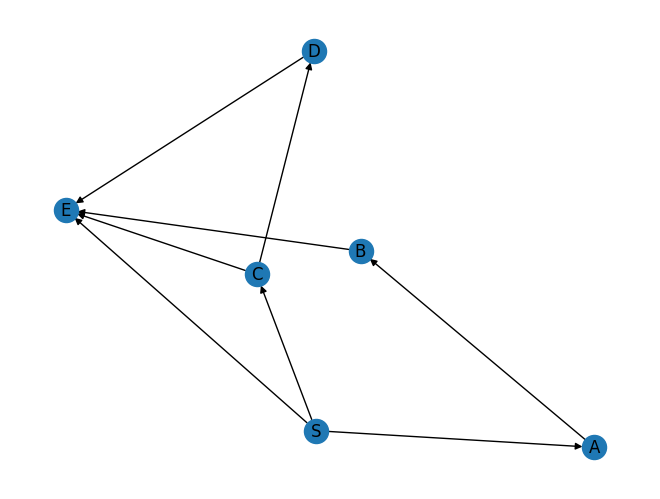

In [7]:
graph = nx.MultiDiGraph()
graph.add_edge('S', 'A', length=2, traveled=True)
graph.add_edge('A', 'B', length=2, traveled=True)
graph.add_edge('S', 'E', length=1, traveled=True)
graph.add_edge('B', 'E', length=2, traveled=False)
graph.add_edge('S', 'C', length=2, traveled=False)
graph.add_edge('C', 'D', length=3, traveled=False)
graph.add_edge('D', 'E', length=1, traveled=False)
graph.add_edge('C', 'E', length=2.5, traveled=False)
nx.set_node_attributes(graph, {
    "S": {"x": 0, "y": 0},
    "A": {"x": 2, "y": 0},
    "B": {"x": 0, "y": -1},
    "C": {"x": 0, "y": 2},
    "D": {"x": -2, "y": 2},
    "E": {"x": -1, "y": 0}
})
nx.draw(graph, with_labels=True)

In [8]:
graph.nodes["S"]

{'x': 0, 'y': 0}

### Next up we load up the exploration graph functionality.



In [16]:
from MaxHeap import MaxHeap
from ExplorationGraph import *
from MaxScoreFrontier import MaxScoreFrontier
from ExplorationSearch import optimal_path_search, optimal_path_search_internal

ImportError: attempted relative import with no known parent package

In [ ]:
settings = ExplorationGraphSettings(
    target_length=5,
    overlength_penalty=1.5,
    outregion_penalty=0.5,
    start="S",
    goal="E",
)

In [ ]:
import math

# Overwrite the distance function for testing (Euclidean distance instead of Haversine)
ex_graph = ExplorationGraph(graph, settings, crs="WGS84")
ex_graph.distance = lambda node1, node2: math.sqrt((node1["x"]-node2["x"]) ** 2 + (node1["y"]-node2["y"]) ** 2)

In [ ]:
# Test Exploration Graph by expanding a dummy starter path
arc = ExplorationArc(None, "S", 0, None)
continuing = ex_graph.continuing_paths(ExplorationPath([arc], 0, 0, 0))
test_path = continuing[2]
def print_list(l):
    print("\n".join(str(item) for item in l))
print("Test path arcs: ")
print_list(test_path.arcs)
print()
print("Test path score so far: ", test_path.score)
print("Best-case test path score (f-score): ", ex_graph.best_case_score(test_path))

Test path arcs: 
ExplorationArc(tail=None, head='S', key=0, attributes=None)
ExplorationArc(tail='S', head='C', key=0, attributes={'length': 2, 'traveled': False})

Test path score so far:  2.0
Best-case test path score (f-score):  5.0


In [ ]:
frontier = MaxScoreFrontier(ex_graph)
search = optimal_path_search_internal(ex_graph, frontier)
optimal_path = next(search)
print("Optimal path score:", optimal_path.score)
print()
print("Optimal path arcs: ")
print_list(optimal_path.arcs)
# That's the right path! A very good sign.

Optimal path score: 4.5

Optimal path arcs: 
ExplorationArc(tail=None, head='S', key=0, attributes=None)
ExplorationArc(tail='S', head='C', key=0, attributes={'length': 2, 'traveled': False})
ExplorationArc(tail='C', head='E', key=0, attributes={'length': 2.5, 'traveled': False})


In [ ]:
next_path = next(search)
print(next_path.score)
print_list(next_path.arcs)
# This also looks good.

3.5
ExplorationArc(tail=None, head='S', key=0, attributes=None)
ExplorationArc(tail='S', head='C', key=0, attributes={'length': 2, 'traveled': False})
ExplorationArc(tail='C', head='D', key=0, attributes={'length': 3, 'traveled': False})
ExplorationArc(tail='D', head='E', key=0, attributes={'length': 1, 'traveled': False})


In [ ]:
# Poke around in the search object to see what's going on
p = search.gi_frame.f_locals["found_paths"]
print("Max heap of unused found paths:")
print_list(p)
print("\nFirst unused found path: ")
print_list(p.container[0][2].arcs)
print("\nFrontier Heap: ")
print_list(frontier.heap)
print("\nFirst heap path: ")
print_list(frontier.heap.container[0][2].arcs)
# The search state looks like I would expect, no unexpected extra paths or anything.

Max heap of unused found paths:
(-0.0, 1, <ExplorationGraph.ExplorationPath object at 0x000001A6D39AC050>)

First unused found path: 
ExplorationArc(tail=None, head='S', key=0, attributes=None)
ExplorationArc(tail='S', head='E', key=0, attributes={'length': 1, 'traveled': True})

Frontier Heap: 
(-0.3786796564403573, 6, <ExplorationGraph.ExplorationPath object at 0x000001A6B19C4590>)

First heap path: 
ExplorationArc(tail=None, head='S', key=0, attributes=None)
ExplorationArc(tail='S', head='A', key=0, attributes={'length': 2, 'traveled': True})
ExplorationArc(tail='A', head='B', key=0, attributes={'length': 2, 'traveled': True})


In [ ]:
# Print out remaining paths
for path in search:
    print(path.score)
    print_list(path.arcs)
    print()

0.0
ExplorationArc(tail=None, head='S', key=0, attributes=None)
ExplorationArc(tail='S', head='E', key=0, attributes={'length': 1, 'traveled': True})

-0.5
ExplorationArc(tail=None, head='S', key=0, attributes=None)
ExplorationArc(tail='S', head='A', key=0, attributes={'length': 2, 'traveled': True})
ExplorationArc(tail='A', head='B', key=0, attributes={'length': 2, 'traveled': True})
ExplorationArc(tail='B', head='E', key=0, attributes={'length': 2, 'traveled': False})

